In [17]:
## Notebook to interact with and visualise segmented volume of cortical layers

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nb
data_dir='../data'

minc_vol = nb.load(os.path.join(data_dir,'full8_200um_optbal.nii.gz'))
layers_vol = nb.load(os.path.join(data_dir,'segmentation_200um.nii.gz'))


In [41]:
#choosing section to plot
section = 300
layers_section=layers_vol.dataobj[section]
histo_section = minc_vol.dataobj[section]

(-0.5, 695.5, 604.5, -0.5)

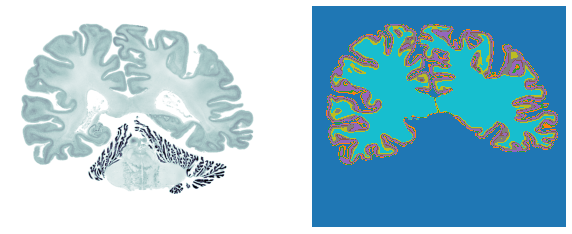

In [42]:
#plotting histology and segmentation side by side
fig,axes = plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(np.flipud(histo_section),cmap='bone')
axes[0].axis('off')
axes[1].matshow(np.flipud(layers_section), cmap='tab10')
axes[1].axis('off')


## Workshop task 1

Convert section of laminar segmentation in to tissue classification where cortex (layers 1-6) is 1, csf/background 0, white matter 2

Plot next to the histology

Calculate the volume of gray matter and white matter in the section

In [43]:
segmentation = (layers_section >0).astype(int) + (layers_section==7).astype(int)

(-0.5, 695.5, 604.5, -0.5)

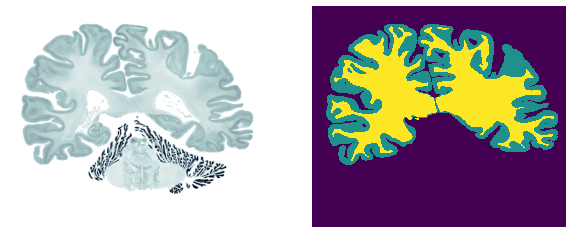

In [44]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(np.flipud(histo_section),cmap='bone')
axes[0].axis('off')
axes[1].matshow(np.flipud(segmentation), cmap='viridis')
axes[1].axis('off')


In [45]:
#Resolution is 200 microns
gm_volume = np.round(np.sum(segmentation==1)*0.2*0.2*0.2)
wm_volume = np.round(np.sum(segmentation==2)*0.2*0.2*0.2)
print(f"GM volume is {gm_volume} mm3")
print(f"WM volume is {wm_volume} mm3")

GM volume is 613.0 mm3
WM volume is 664.0 mm3
